In [1]:
# Correlation Heatmap

# Load file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

CLEAN_PATH = Path("../data/clean")
summary = pd.read_csv(CLEAN_PATH / "summary_clean.csv")

summary.head()


C:\Users\lanam\AppData\Local\Temp\ipykernel_2492\2422542942.py:11: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  summary = pd.read_csv(CLEAN_PATH / "summary_clean.csv")


,year,locationabbr,locationdesc,facilityname,city,clinic_status,topic,subtopic,question,breakout_category,breakout,data_value,data_value_num,cycle_count,clinicid,geolocation,year.1
0,2020,OH,Ohio,Institute for Reproductive Health,Cincinnati,Open,Summary,Footnote,Cycles evaluating new procedures,NaN,NaN,0,0,NaN,143,POINT (-84.4439587 39.148408),2020
1,2020,OK,Oklahoma,OU Physicians Reproductive Medicine,Oklahoma City,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of cycles discontinued after retrie...,Age of Patient,<35,6.3,6.3,410,9,POINT (-97.5009249 35.4774816),2020
2,2020,NY,New York,Strong Fertility Center,Rochester,Open,Summary,"Reason for Using ART (a,b,g)",Gestational carrier,NaN,NaN,0,0,762,357,POINT (-77.6303291 43.0645425),2020
3,2020,CO,Colorado,Rocky Mountain Fertility Center,Englewood,Open,Summary,Footnote,Cycles evaluating new procedures,NaN,NaN,0,0,NaN,299,POINT (-104.841853 39.5367013),2020
4,2020,NC,North Carolina,UNC Fertility,Raleigh,Open,Summary,Clinic Services & Profile,Donor egg services,Yes/No,Yes,Yes,0,NaN,344,POINT (-78.7636599 35.9067499),2020


In [2]:
# Select numeric columns only
numeric_cols = summary.select_dtypes(include=['number'])

# Confirm what numeric columns we have
numeric_cols.head()


,year,year.1
0,2020,2020
1,2020,2020
2,2020,2020
3,2020,2020
4,2020,2020


In [3]:
summary["question"].sample(20)


16215     Percentage of retrievals resulting in live-bir...
125228    Percentage of transfers using a gestational ca...
103996                                  Number of transfers
166817                                Ovulatory dysfunction
174806    Percentage of transfers resulting in singleton...
110939    Percentage of retrievals resulting in live-bir...
173217      Percentage of cycles for fertility preservation
174936    Percentage of transfers resulting in live-birt...
106216    Percentage of intended egg retrieval cycles wi...
95942     Percentage of transfers of at least 1 embryo w...
78754                            Diminished ovarian reserve
109025                           Verified lab accreditation
160203                               Total number of cycles
105314                     Embryo cryopreservation services
99622                                   Gestational carrier
54310     Percentage of new patients having live-birth d...
83140     Percentage of transfers of at 

In [9]:
# Select only numerical indicators with clinical meaning
# Keep only *success metrics*, not services
success_keywords = [
    "live-birth",
    "live birth",
    "singleton",
    "retriev",         # retrieval(s)
    "transfer",        # transfer(s)
    "intended",
    "number of transfers",
    "total number of cycles",
    "cycles discontinued",
    "fertility preservation",
    "new patients"
]

mask = (
    summary["question"].str.contains("|".join(success_keywords), case=False, na=False)
    &
    ~summary["question"].str.contains("services", case=False, na=False)   # remove services
)

metrics = summary[mask].copy()
metrics.head(10)



,year,locationabbr,locationdesc,facilityname,city,clinic_status,topic,subtopic,question,breakout_category,breakout,data_value,data_value_num,cycle_count,clinicid,geolocation,year.1
1,2020,OK,Oklahoma,OU Physicians Reproductive Medicine,Oklahoma City,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of cycles discontinued after retrie...,Age of Patient,<35,6.3,6.3,410,9,POINT (-97.5009249 35.4774816),2020
8,2020,CA,California,Fertility and Surgical Associates of California,Thousand Oaks,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of cycles discontinued after retrie...,Age of Patient,35-37,8.9,8.9,"1,314",270,POINT (-118.871559 34.1747551),2020
11,2020,AZ,Arizona,IVF Phoenix,Scottsdale,Open,Summary,"Characteristics of ART Cycles (a,b)",Total number of cycles,Age of Patient,>40,46,46,220,384,POINT (-111.8755363 33.5756287),2020
13,2020,CA,California,Alta Bates In Vitro Fertilization Program,Berkeley,Open,Summary,Cumulative ART Success Rates for Intended Retr...,Number of intended retrievals,Age of Patient,38-40,5,5,21,95,POINT (-122.2563715 37.8559436),2020
14,2020,CA,California,West Coast Fertility Center,Fountain Valley,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of transfers of at least 1 embryo w...,Age of Patient,>40,100.0,100,95,84,POINT (-117.9343068 33.715514),2020
15,2020,DC,District of Columbia,Columbia Fertility Associates,Washington,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of transfers of at least 1 embryo w...,Age of Patient,38-40,53.5,53.5,334,370,POINT (-77.052984 38.904908),2020
16,2020,CA,California,Nova In Vitro Fertilization,Mountain View,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of intended egg retrieval cycles wi...,Age of Patient,35-37,11.7,11.7,463,460,POINT (-122.0824654 37.368271),2020
19,2020,FL,Florida,"Southwest Florida Fertility Center, PA",Fort Myers,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of transfers using a gestational ca...,Age of Patient,Total,0.0,0,71,284,POINT (-81.8971593 26.5151137),2020
25,2020,FL,Florida,IVFMD/South Florida Institute for Reproductive...,South Miami,Reorganized,Summary,"Characteristics of ART Cycles (a,b)",Percentage of cycles discontinued after retrie...,Age of Patient,<35,7.8,7.8,"1,926",45,POINT (-80.2951534 25.7028066),2020
26,2020,DC,District of Columbia,Columbia Fertility Associates,Washington,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of transfers of at least 1 embryo w...,Age of Patient,Total,80.5,80.5,334,370,POINT (-77.052984 38.904908),2020


In [10]:
# Clean metric names
import re

def clean_metric_name(q):
    # Lowercase, replace spaces, limit length
    name = q.lower()
    name = re.sub(r'[^a-z0-9]+', '_', name)  # replace non-letters with _
    name = re.sub(r'_+', '_', name)          # collapse __
    return name[:40]                         # limit to 40 chars

metrics["metric_name"] = metrics["question"].apply(clean_metric_name)
metrics.head()


,year,locationabbr,locationdesc,facilityname,city,clinic_status,topic,subtopic,question,breakout_category,breakout,data_value,data_value_num,cycle_count,clinicid,geolocation,year.1,metric_name
1,2020,OK,Oklahoma,OU Physicians Reproductive Medicine,Oklahoma City,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of cycles discontinued after retrie...,Age of Patient,<35,6.3,6.3,410,9,POINT (-97.5009249 35.4774816),2020,percentage_of_cycles_discontinued_after_
8,2020,CA,California,Fertility and Surgical Associates of California,Thousand Oaks,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of cycles discontinued after retrie...,Age of Patient,35-37,8.9,8.9,"1,314",270,POINT (-118.871559 34.1747551),2020,percentage_of_cycles_discontinued_after_
11,2020,AZ,Arizona,IVF Phoenix,Scottsdale,Open,Summary,"Characteristics of ART Cycles (a,b)",Total number of cycles,Age of Patient,>40,46,46,220,384,POINT (-111.8755363 33.5756287),2020,total_number_of_cycles
13,2020,CA,California,Alta Bates In Vitro Fertilization Program,Berkeley,Open,Summary,Cumulative ART Success Rates for Intended Retr...,Number of intended retrievals,Age of Patient,38-40,5,5,21,95,POINT (-122.2563715 37.8559436),2020,number_of_intended_retrievals
14,2020,CA,California,West Coast Fertility Center,Fountain Valley,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of transfers of at least 1 embryo w...,Age of Patient,>40,100.0,100,95,84,POINT (-117.9343068 33.715514),2020,percentage_of_transfers_of_at_least_1_em


In [12]:
#Pivot to make one row per clinic per year
import re

def clean_metric_name(q):
    # Lowercase, replace spaces, limit length
    name = q.lower()
    name = re.sub(r'[^a-z0-9]+', '_', name)  # replace non-letters with _
    name = re.sub(r'_+', '_', name)          # collapse __
    return name[:40]                         # limit to 40 chars

metrics["metric_name"] = metrics["question"].apply(clean_metric_name)
metrics.head()


,year,locationabbr,locationdesc,facilityname,city,clinic_status,topic,subtopic,question,breakout_category,breakout,data_value,data_value_num,cycle_count,clinicid,geolocation,year.1,metric_name
1,2020,OK,Oklahoma,OU Physicians Reproductive Medicine,Oklahoma City,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of cycles discontinued after retrie...,Age of Patient,<35,6.3,6.3,410,9,POINT (-97.5009249 35.4774816),2020,percentage_of_cycles_discontinued_after_
8,2020,CA,California,Fertility and Surgical Associates of California,Thousand Oaks,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of cycles discontinued after retrie...,Age of Patient,35-37,8.9,8.9,"1,314",270,POINT (-118.871559 34.1747551),2020,percentage_of_cycles_discontinued_after_
11,2020,AZ,Arizona,IVF Phoenix,Scottsdale,Open,Summary,"Characteristics of ART Cycles (a,b)",Total number of cycles,Age of Patient,>40,46,46,220,384,POINT (-111.8755363 33.5756287),2020,total_number_of_cycles
13,2020,CA,California,Alta Bates In Vitro Fertilization Program,Berkeley,Open,Summary,Cumulative ART Success Rates for Intended Retr...,Number of intended retrievals,Age of Patient,38-40,5,5,21,95,POINT (-122.2563715 37.8559436),2020,number_of_intended_retrievals
14,2020,CA,California,West Coast Fertility Center,Fountain Valley,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of transfers of at least 1 embryo w...,Age of Patient,>40,100.0,100,95,84,POINT (-117.9343068 33.715514),2020,percentage_of_transfers_of_at_least_1_em


In [ ]:
# Work only with the columns that really need for the pivot
metrics_pivot = metrics[["clinicid", "year", "metric_name", "data_value_num"]].copy()

# Force data_value_num to numeric 
metrics_pivot["data_value_num"] = pd.to_numeric(
    metrics_pivot["data_value_num"], errors="coerce"
)

# check dtypes to be sure
print(metrics_pivot.dtypes)

# create the pivot table
pivot = metrics_pivot.pivot_table(
    index=["clinicid", "year"],
    columns="metric_name",
    values="data_value_num",
    aggfunc="mean"
).reset_index()

pivot.head()


clinicid           object
year                int64
metric_name        object
data_value_num    float64
dtype: object


metric_name,clinicid,year,average_number_of_intended_retrievals_pe,average_number_of_transfers_per_intended,number_of_intended_retrievals,number_of_retrievals,number_of_transfers,percentage_of_cycles_discontinued_after_,percentage_of_cycles_for_fertility_prese,percentage_of_intended_egg_retrieval_cyc,percentage_of_intended_retrievals_result,percentage_of_new_patients_having_live_b,percentage_of_retrievals_resulting_in_li,percentage_of_retrievals_resulting_in_si,percentage_of_transfers_of_at_least_1_em,percentage_of_transfers_resulting_in_liv,percentage_of_transfers_resulting_in_sin,percentage_of_transfers_using_a_gestatio,percentage_of_transfers_using_frozen_emb,total_number_of_cycles
0,1,2021,2.5500,0.500,105.500000,100.25,31.125,14.360,7.860,6.70,19.8875,27.841667,20.950,20.500,77.390000,19.7500,19.350,2.44,93.140000,476.800000
1,1,2022,4.5375,0.500,158.500000,146.50,42.500,15.160,11.500,6.72,21.7625,31.366667,23.300,23.100,71.600000,28.0500,27.375,2.80,93.840000,396.250000
2,2,2021,2.2500,0.825,201.250000,189.00,132.000,8.360,3.320,7.42,38.6250,47.075000,41.475,40.625,70.620000,40.3500,38.925,3.70,92.720000,1049.600000
3,2,2022,2.9125,0.800,246.250000,230.00,153.625,10.580,2.660,7.94,34.7625,41.341667,37.625,37.125,73.160000,38.0625,37.325,2.60,94.500000,602.000000
4,3,2021,1.5000,0.700,39.333333,30.50,8.500,44.825,1.175,22.90,17.9200,13.442857,15.075,12.800,62.366667,5.4500,4.100,0.00,37.133333,90.666667


In [24]:
pivot = metrics_pivot.pivot_table(
    index=["clinicid", "year"],
    columns="metric_name",
    values="data_value_num",
    aggfunc="mean"
).reset_index()

pivot.head()


metric_name,clinicid,year,average_number_of_intended_retrievals_pe,average_number_of_transfers_per_intended,number_of_intended_retrievals,number_of_retrievals,number_of_transfers,percentage_of_cycles_discontinued_after_,percentage_of_cycles_for_fertility_prese,percentage_of_intended_egg_retrieval_cyc,percentage_of_intended_retrievals_result,percentage_of_new_patients_having_live_b,percentage_of_retrievals_resulting_in_li,percentage_of_retrievals_resulting_in_si,percentage_of_transfers_of_at_least_1_em,percentage_of_transfers_resulting_in_liv,percentage_of_transfers_resulting_in_sin,percentage_of_transfers_using_a_gestatio,percentage_of_transfers_using_frozen_emb,total_number_of_cycles
0,1,2021,2.5500,0.500,105.500000,100.25,31.125,14.360,7.860,6.70,19.8875,27.841667,20.950,20.500,77.390000,19.7500,19.350,2.44,93.140000,476.800000
1,1,2022,4.5375,0.500,158.500000,146.50,42.500,15.160,11.500,6.72,21.7625,31.366667,23.300,23.100,71.600000,28.0500,27.375,2.80,93.840000,396.250000
2,2,2021,2.2500,0.825,201.250000,189.00,132.000,8.360,3.320,7.42,38.6250,47.075000,41.475,40.625,70.620000,40.3500,38.925,3.70,92.720000,1049.600000
3,2,2022,2.9125,0.800,246.250000,230.00,153.625,10.580,2.660,7.94,34.7625,41.341667,37.625,37.125,73.160000,38.0625,37.325,2.60,94.500000,602.000000
4,3,2021,1.5000,0.700,39.333333,30.50,8.500,44.825,1.175,22.90,17.9200,13.442857,15.075,12.800,62.366667,5.4500,4.100,0.00,37.133333,90.666667


In [28]:
name_map = {
    "average_number_of_intended_retrievals_pe": "Avg Intended Retrievals",
    "average_number_of_transfers_per_intended": "Avg Transfers per Intended",
    "number_of_intended_retrievals": "Intended Retrievals",
    "number_of_retrievals": "Retrievals",
    "number_of_transfers": "Transfers",
    "percentage_of_cycles_discontinued_after_": "% Cycles Discontinued",
    "percentage_of_cycles_for_fertility_prese": "% Fertility Preservation",
    "percentage_of_intended_egg_retrieval_cyc": "% Egg Retrieval Cycles",
    "percentage_of_intended_retrievals_result": "% Intended Retrievals → Live Birth",
    "percentage_of_new_patients_having_live_b": "% New Patients → Live Birth",
    "percentage_of_retrievals_resulting_in_li": "% Retrievals → Live Birth",
    "percentage_of_retrievals_resulting_in_si": "% Retrievals → Singleton Birth",
    "percentage_of_transfers_of_at_least_1_em": "% Transfers with ≥1 Embryo",
    "percentage_of_transfers_resulting_in_liv": "% Transfers → Live Birth",
    "percentage_of_transfers_resulting_in_sin": "% Transfers → Singleton Birth",
    "percentage_of_transfers_using_a_gestatio": "% Using Gestational Carrier",
    "percentage_of_transfers_using_frozen_emb": "% Frozen Embryo Transfers",
    "total_number_of_cycles": "Total Cycles"
}

pivot_clean = pivot.rename(columns=name_map)


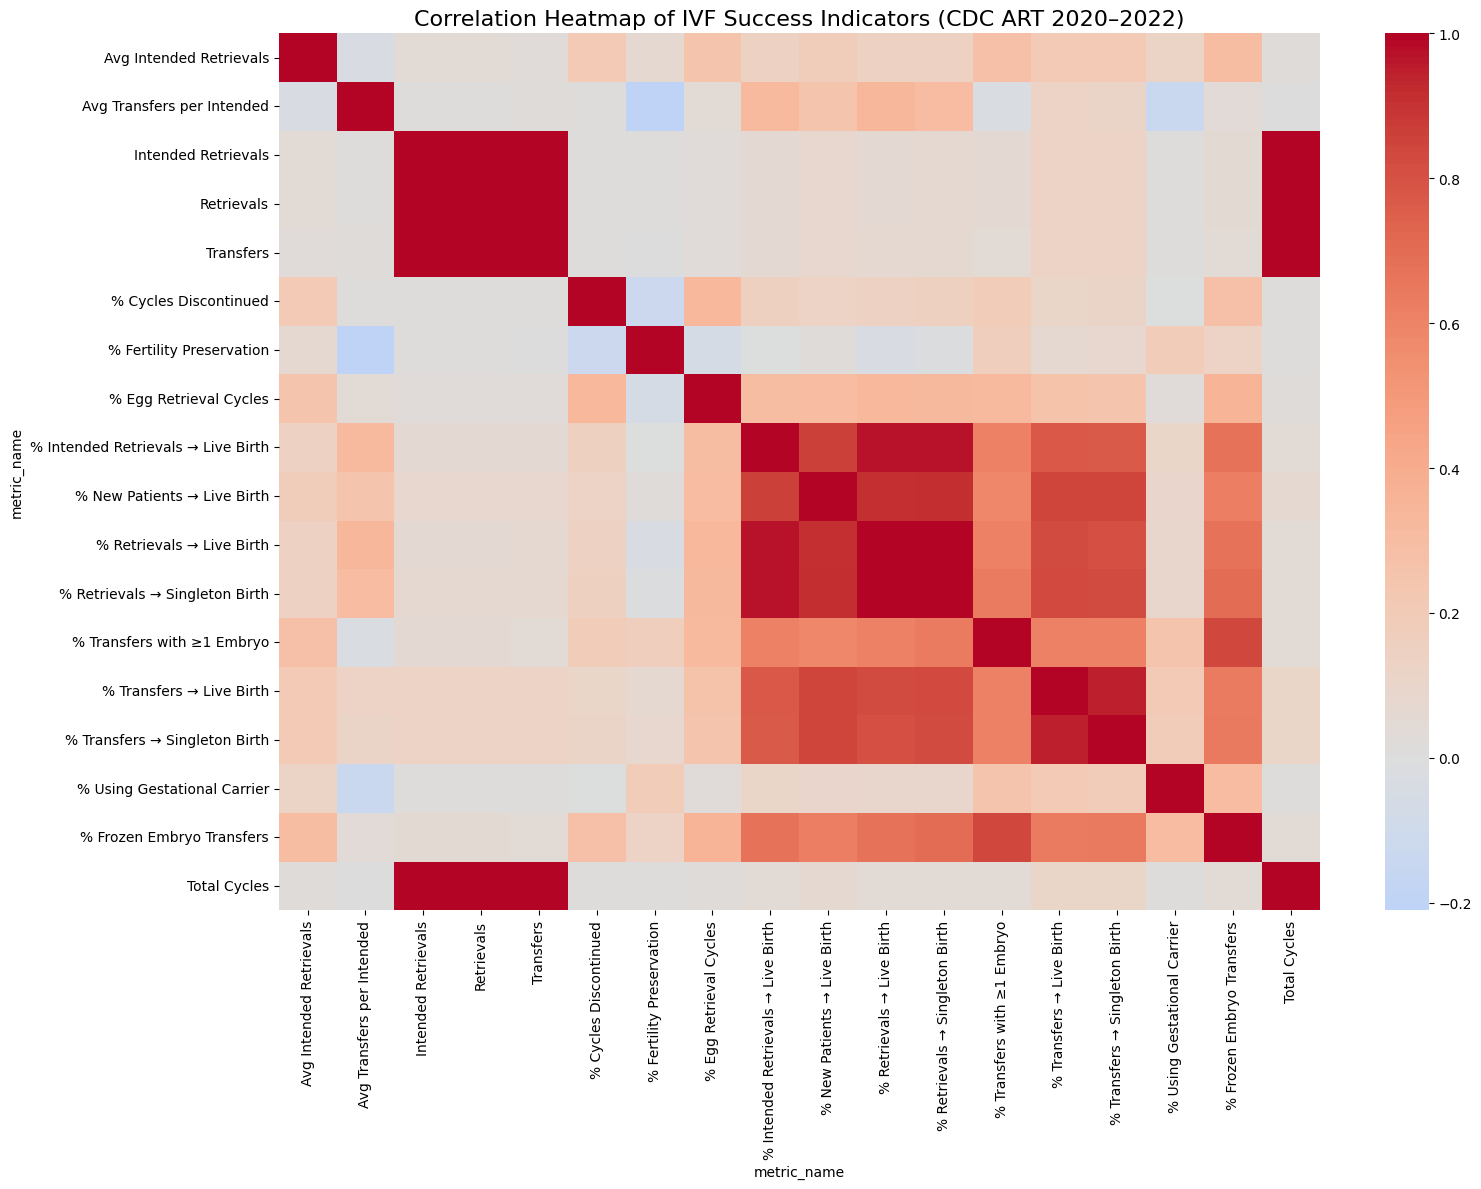

In [ ]:
# Make a copy and drop ID columns
corr_data = pivot_clean.drop(columns=["clinicid", "year"]).copy()

# Force all columns to numeric (remove commas, coerce errors to NaN)
for col in corr_data.columns:
    corr_data[col] = (
        corr_data[col]
        .astype(str)
        .str.replace(",", "", regex=False)
    )
    corr_data[col] = pd.to_numeric(corr_data[col], errors="coerce")

# Now compute the correlation matrix on *numeric* data only
corr_matrix = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=False
)
plt.title("Correlation Heatmap of IVF Success Indicators (CDC ART 2020–2022)", fontsize=16)
plt.tight_layout()
plt.show()
